In [1]:
# Universaidad Nacional Autónoma de México
# Facultad de Ingeniería
# Aprendizaje (Máquina)
# Programa 04
# Algoritmo Genético
# Aguilar Enriquez Paul Sebastian
# Cabrera Lopez Oscar Emilio

In [2]:
import random
from matplotlib import pyplot as plt


In [3]:
# Parametros del algoritmo

## Número de genes: 16
numGenes = 16
## Metodo de selección: Ruleta
## Cruza: De 2 puntos , crossover_rate(pc) = 80%
crossover_points = 2
crossover_rate = 8
## Mutación: -, mutation_rate(pm) = 1%
mutation_rate = .01
## Tamaño de población: 50
population = 50
## Cantidad de generaciones: 20
generations = 20

In [4]:
# Funciones de apoyo

## Verifica la suma de capital a invertir y que este se encuentre en el 
## rango valido
def inversionValida(a, b, c, d):
    inversion = a + b + c + d
    if (inversion > 0) and (inversion <= 10):
        return True
    else:
        return False
    
## Convierte de decimal a binario
def dec2bin(dec):
    bina = []
    
    # Convertimos el valor decimal a binario
    while int(dec/2) != 0:
        bina.append( int(dec%2) )
        dec = dec/2
    if dec > 0:
        bina.append(1)
    
    # Completamos los valores faltantes
    while(len(bina) < 4):
        bina.append(0)
    bina.reverse()
    return bina

## Convierte de binario a decimal
def bin2dec(bina):
    dec = []
    val = 0
    slide = 1
    
    # Recorremos los bits con una ventana de 4
    for i in range(numGenes):
        if bina[i] == 1:
            val += pow(2,(4*slide)-1-i)
        if (i+1)%4 == 0:
            dec.append(val)
            val = 0
            slide += 1
    return dec

In [5]:
#Funcion y valores de mercado

## Valores de mercado
T1 = [0.00, 0.28, 0.45, 0.65, 0.78, 0.90, 1.02, 1.13, 1.23, 1.32, 1.38]
T2 = [0.00, 0.25, 0.41, 0.55, 0.65, 0.75, 0.80, 0.85, 0.88, 0.90, 0.90]
T3 = [0.00, 0.15, 0.25, 0.40, 0.50, 0.62, 0.73, 0.82, 0.90, 0.96, 1.00]
T4 = [0.00, 0.20, 0.33, 0.42, 0.48, 0.53, 0.56, 0.58, 0.60, 0.60, 0.60]

## Función de aptitud
def F(inv1, inv2, inv3, inv4):
    sumInversionTotal = inv1 + inv2 + inv3 + inv4;
    V = abs(sumInversionTotal - 10)
    
    # Ahora sí función de aptitud :D
    x = (T1[inv1] + T2[inv2] + T3[inv3] + T4[inv4]) / ( (500*V)+1 )
    return x

In [6]:
#Inicialización
pobDec = []
pobBin = []

## Generador de población
def generador():
    # Creamos la cantidad de poblacion
    for i in range(population):
        # Limpiamos valores
        a = 0
        b = 0
        c = 0
        d = 0
        
        # Proponemos los valores a invertir de manera aleatoria
        # y verificamos que se encuentren en el rango de 
        # 0 <= inversion <= 10
        while(not inversionValida(a, b, c, d)):
            a = random.randint(0, 11)
            b = random.randint(0, 11 - a)
            c = random.randint(0, 11 - a - b)
            d = random.randint(0, 11 - a - b - c)
        
        # Guardamos al individuo en su formato decimal
        pobDec.append([a, b, c, d])
        # Guardamos al individuo en su formato binario
        pobBin.append(dec2bin(a) + dec2bin(b) + dec2bin(c) + dec2bin(d))

## Imprime la poblacion feliz de nuestro universo :D
def imprimirPoblacion():
    print("\n\n# Poblacion #")
    for i in range(population):
        print("Individuo " , i, ": ", pobDec[i])
        print("Binario ", i, ": ", pobBin[i])

In [7]:
# Evaluación
pobAptitud = []
sumAptitud = 0

def evaluacion():
    global pobAptitud
    pobAptitud = []
    global sumAptitud
    sumAptitud = 0
    
    for i in range(population):
        # Evaluamos con la función de aptitud dada
        pobAptitud.append(F(pobDec[i][0], pobDec[i][1], pobDec[i][2], pobDec[i][3]))
        # Vamos calculando la suma de las aptitudes, se necesitara en la seleccion
        sumAptitud += pobAptitud[i]
    
def imprimirEvaluacion():
    print("\n\n# Aptitud de la población #")
    for i in range(population):
        print("Aptitud ", i, ": ", pobAptitud[i])
    print("Suma de la aptitud: ", sumAptitud)

In [8]:
# Seleccion
promedio = 0
pobPromedio = []
pobVe = []
sumVe = 0
pobAcum = []
pobR = []
pobSelec = []

def seleccion():
    global promedio
    promedio = 0
    global pobPromedio
    global pobVe
    pobVe = []
    global sumVe
    sumVe = 0
    global pobAcum
    pobAcum = []
    global pobR
    pobR = []
    global pobSelec
    pobSelec = []
    
    # calculamos el promedio de las aptitudes
    promedio = sumAptitud / population
    pobPromedio.append(promedio)
    
    # Calculamos los valores esperados para cada individuo
    for i in range(population):
        pobVe.append(pobAptitud[i]/promedio)
        sumVe += pobVe[i];
        pobAcum.append(sumVe)
    
    # Aquí empieza la ruleta!
    for i in range(population):
        # Generamos una r aleatoria
        pobR.append(random.uniform(0,sumVe))
        # Buscamos el primer elementos que es mayor o igual en su acumulado
        # que la r generada
        for j in range(population):
            if pobAcum[j] >= pobR[i]:
                pobSelec.append(j)
                break

def imprimirSeleccion():
    print("\n\n# Calculo de valores para la seleccion de la población #")
    for i in range(population):
        print("Ve ", i, ": ", pobVe[i])
        print("Acumulado ", i, ": ", pobAcum[i])
    print("\nPromedio: ", promedio)
    print("Sum Ve: ", sumVe)
    
    print("\n\n# Seleccion de la población #")
    for i in range(population):
        print("r ", i, ": ", pobR[i])
        print("Ind. seleccionado: ", pobSelec[i])
    
# Es para cargar la población despues de la selección, así podemos
# operar sobre de ella ya con los individuos seleccionados
def configurarPoblacionSeleccionada():
    global pobDec
    global pobBin
    pobDecN = []
    pobBinN = []
    
    for i in range(population):
        pobDecN.append(pobDec[pobSelec[i]])
        pobBinN.append(pobBin[pobSelec[i]])
    
    pobDec = pobDecN
    pobBin = pobBinN

In [9]:
# Cruza
pobK = [] # Valores de K
pobKI = [] # Indices seleccionados para hacer la cruza

def cruza():
    global pobK
    pobK = []
    global ponKI
    pobKI = []
    global pobDec
    global pobBin
    
    # Generamos el valor K para los individuos a cruzar de
    # entre los seleccionados
    for i in range(population):
        pobK.append(random.uniform(0,1))
        
        # Si el valor K generado es menor al pc
        # seleccionamos al individuo para cruzar
        if pobK[i] < crossover_rate:
            pobKI.append(i)
        
    # Ahora procedemos a hacer la cruza
    pobCruzada = [] # Población hija o resultante
    
    # Imprimimos las cruzas seleccionadas ;@
    print("\n\n# Cruza! #")
    for i in range(population):
        print("k ", i, ": ", pobK[i])
    
    print("\nIndividuos a cruzar de los seleccionados: ", pobKI)
    print("\nTotal de individuos a cruzar de los seleccionados: ", len(pobKI))
    
    print("\nProceso de cruza")
    for i in range(len(pobKI)):
        # Va de 1 a 14, excluimos el 0 y el 15 porque son las orillas
        p1 = random.randint(1,15)
        p2 = random.randint(1,15)
        
        # Validamos el orden de los indices en los puntos
        # Si el primer punto es mayor que el segundo, esta mas lejos
        # en el indice de posiciones, hay que intercambiarlos
        if p1 > p2:
            temp = p1
            p1 = p2
            p2 = temp
        
        # Ahora si va la cruza!
        # Tomamos las orillas del primero y el centro del segundo
        print("punto1: ", p1, " punto2: ", p2)
        print("\tPadre1: ", pobBin[pobKI[i]])
        if i < len(pobKI) - 1:
            print("\tPadre2:\t", pobBin[pobKI[i+1]])
            pobCruzada.append(pobBin[pobKI[i]][0:p1] + pobBin[pobKI[i+1]][p1:p2] + pobBin[pobKI[i]][p2:numGenes])
        else:
            print("\tPadre2:\t", pobBin[pobKI[0]])
            pobCruzada.append(pobBin[pobKI[i]][0:p1] + pobBin[pobKI[0]][p1:p2] + pobBin[pobKI[i]][p2:numGenes])
        print("\tHijo:\t", pobCruzada[i])
    
    # Guardamos las combinaciones resultantes en la poblacion
    for i in range(len(pobKI)):
        pobBin[pobKI[i]] = pobCruzada[i]
        pobDec[pobKI[i]] = bin2dec(pobCruzada[i])

In [10]:
# Mutación

def mutacion():
    global pobDec
    global pobBin
    
    # Calculamos el número de mutaciones
    total_gen = numGenes * population
    # Le sumamos 2 para asegurar que por lo menos haya un par
    # de genes a mutar ya que el mutation_rate es muy pequeño
    num_mutation = int(mutation_rate * total_gen) + 2
    
    print("\n\n# Mutacion! #")
    print("Total de mutaciones: ", num_mutation)
    
    # Aqui almacenaremos los indices de los genes a mutar
    mutationIndex = []
    
    # Calculamos los genes a mutar
    for i in range(num_mutation):
        mutationIndex.append(random.randint(0,total_gen-1))
    
    print("Genes a mutar: ", mutationIndex)
    
    # Comenzamos la mutación
    for i in range(num_mutation-1):
        # Calculamos los individuos y el gen de ese individuo
        # a intercambiar
        ind1 = int(mutationIndex[i]/numGenes)
        gen1 = mutationIndex[i]-int(ind1*numGenes)
        ind2 = int(mutationIndex[i+1]/numGenes)
        gen2 = mutationIndex[i+1]-int(ind2*numGenes)
        
        print("Se mutara individuo", ind1, "gen", gen1, " e individuo", ind2, "gen", gen2)
        print("\tAntes de mutar:")
        print("\t\tIndividuo ", ind1, ": ", pobBin[ind1])
        print("\t\tIndividuo ", ind2, ": ", pobBin[ind2])
        
        # Hacemos un swap
        temp = pobBin[ind1][gen1]
        pobBin[ind1][gen1] = pobBin[ind2][gen2]
        pobBin[ind2][gen2] = temp
        
        # Convertimos cada individuo mutado a su versión en decimal
        pobDec[ind1] = bin2dec(pobBin[ind1])
        pobDec[ind2] = bin2dec(pobBin[ind2])
        
        print("\tDespues de mutar:")
        print("\t\tIndividuo ", ind1, ": ", pobBin[ind1])
        print("\t\tIndividuo ", ind2, ": ", pobBin[ind2])
        
        # Damos un paso extra para que realmente el ciclo avance
        # de dos en dos
        i += 1

In [11]:
# Determinamos al mejor individuo para esta generación

mejorInd = 0
mejorApt = 0

def mejorIndividuo():
    global mejorInd
    global mejorApt
    global pobAptitud
    
    pobAptitud = []
    
    for i in range(population):
        pobAptitud.append(F(pobDec[i][0], pobDec[i][1], pobDec[i][2], pobDec[i][3]))
        if pobAptitud[i] > mejorApt:
            mejorApt = pobAptitud[i]
            mejorInd = i

def imprimirMejorIndividuo():
    imprimirEvaluacion()
    print("\n\nEl mejor individuo es el individuo", mejorInd)
    print("\t", pobDec[mejorInd],"\t",pobBin[mejorInd])
            

In [12]:
# Validamos que sigan siendo individuos validos
pobMuertes = []

def validarPoblacion():
    global pobMuertes
    global pobDec
    global pobBin
    
    pobPeor = []
    # Hacemos un ajuste, al cruzar o mutar un individuo este puede terminar
    # con una configuración que invierte más de 10 unidades de millon
    # Si esto sucede el individuo debe morir y ser reemplazado por el
    # mejor individuo ;@
    
    # Para esto primero sustuimos el individuo que ya excedio el limite de 
    # inversión con uno con valores en cero el cual no genera ganacias,
    # es un neutro, despues volvemos a evaluar la poblacion con el individuo
    # nuevo, y sustituimos con el mejor de esta poblacion
    print("\n\n# Validando poblacion tras ser modificada #")
    
    # Buscamos a los individuos que rompen la regla de inversion y los
    # sustituimos por un individuo que corresponda a no realizar inversion
    contadorMuertes = 0
    for i in range(population):
        if pobDec[i][0] + pobDec[i][1] + pobDec[i][2] + pobDec[i][3] > 10:
            pobPeor.append(i)
            print("\tEl individuo ", i, " debe morir, su inversión excede 10 millones: ", pobDec[i])
            pobDec[i] = [0,0,0,0]
            pobBin[i] = dec2bin(int(pobDec[i][0])) + dec2bin(int(pobDec[i][1])) + dec2bin(int(pobDec[i][2])) + dec2bin(int(pobDec[i][3]))
            print("\tEl individuo ", i, " fue sustituido temporalmente por: ", pobDec[i])
            contadorMuertes += 1
    
    # De la población modificada con los temporales buscamos al mejor individuo
    mejorIndividuo()
    
    # Sustituimos a los peores individuos con el mejor
    for i in range(len(pobPeor)):
        pobDec[i] = pobDec[mejorInd]
        pobBin[i] = pobBin[mejorInd]
    
    print("\tLos individuos ", pobPeor, " fueron sustituidos por el individuo ", mejorInd, ": ", pobDec[mejorInd])
    # Llevamos un contador de muertes :P
    pobMuertes.append(contadorMuertes)

In [13]:
def main():
    print("Recordar que los indices para los elementos comienzan en cero!")
    generador()
    imprimirPoblacion()
    for i in range(generations):
        print("\n###-> Generacion ", i, " <-###")
        evaluacion()
        imprimirEvaluacion()
        seleccion()
        imprimirSeleccion()
        configurarPoblacionSeleccionada()
        imprimirPoblacion()
        cruza()
        validarPoblacion()
        imprimirPoblacion()
        mutacion()
        validarPoblacion()
        imprimirPoblacion()
        mejorIndividuo()
        imprimirMejorIndividuo()
    
    plt.plot(pobPromedio, label='Promedio')
    plt.title('Promedio de Aptitud')
    plt.ylabel('Promedio')
    plt.xlabel('Generaciones')
    plt.legend(loc = 'best')
    plt.show()
    
    plt.plot(pobMuertes, label='Sustituciones')
    plt.title('Sustituciones por exceder el limite de inversion')
    plt.ylabel('Sustituciones')
    plt.xlabel('Generaciones (Cruza y mutacion)')
    plt.legend(loc = 'best')
    plt.show()

Recordar que los indices para los elementos comienzan en cero!


# Poblacion #
Individuo  0 :  [8, 1, 1, 0]
Binario  0 :  [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  1 :  [2, 1, 3, 0]
Binario  1 :  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Individuo  2 :  [9, 0, 1, 0]
Binario  2 :  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  3 :  [0, 1, 1, 6]
Binario  3 :  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Individuo  4 :  [2, 3, 2, 0]
Binario  4 :  [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Individuo  5 :  [1, 1, 1, 6]
Binario  5 :  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Individuo  6 :  [4, 4, 0, 0]
Binario  6 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  7 :  [5, 5, 0, 0]
Binario  7 :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  8 :  [10, 0, 0, 0]
Binario  8 :  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  9 :  [5, 2, 2, 1]
Binario  9 :  [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


Individuo  4 :  [7, 2, 0, 1]
Binario  4 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  5 :  [7, 0, 0, 1]
Binario  5 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  6 :  [7, 2, 0, 1]
Binario  6 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  7 :  [7, 2, 0, 1]
Binario  7 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  8 :  [7, 2, 0, 1]
Binario  8 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  9 :  [7, 2, 0, 1]
Binario  9 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  10 :  [7, 2, 0, 1]
Binario  10 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  11 :  [7, 2, 0, 1]
Binario  11 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  12 :  [7, 2, 0, 1]
Binario  12 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  13 :  [7, 2, 0, 1]
Binario  13 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  14 :  [7, 0, 0, 1]
Binario  14 :  [0, 1, 1, 1, 0, 0, 0, 0, 0,

Binario  16 :  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Individuo  17 :  [2, 0, 4, 0]
Binario  17 :  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Individuo  18 :  [7, 0, 0, 1]
Binario  18 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  19 :  [0, 0, 0, 0]
Binario  19 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  20 :  [5, 4, 0, 0]
Binario  20 :  [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  21 :  [6, 4, 0, 0]
Binario  21 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  22 :  [7, 0, 0, 1]
Binario  22 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  23 :  [7, 0, 0, 1]
Binario  23 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  24 :  [0, 0, 0, 0]
Binario  24 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  25 :  [0, 0, 0, 0]
Binario  25 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  26 :  [7, 0, 0, 1]
Binario  26 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Individuo  35 :  [6, 0, 1, 0]
Binario  35 :  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  36 :  [0, 0, 0, 0]
Binario  36 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  37 :  [0, 0, 0, 0]
Binario  37 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  38 :  [4, 4, 0, 0]
Binario  38 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  39 :  [0, 0, 0, 0]
Binario  39 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  40 :  [0, 0, 0, 0]
Binario  40 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  41 :  [7, 0, 1, 2]
Binario  41 :  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
Individuo  42 :  [3, 0, 0, 2]
Binario  42 :  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Individuo  43 :  [0, 0, 0, 0]
Binario  43 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  44 :  [0, 0, 0, 0]
Binario  44 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  45 :  [6, 0, 4, 0]
Binario  45 :  [0, 1, 1, 0, 0,

Aptitud  15 :  0.0012787212787212787
Aptitud  16 :  0.000766155896069287
Aptitud  17 :  1.73
Aptitud  18 :  0.0013586413586413586
Aptitud  19 :  1.67
Aptitud  20 :  1.67
Aptitud  21 :  1.73
Aptitud  22 :  0.0
Aptitud  23 :  0.0
Aptitud  24 :  0.0
Aptitud  25 :  1.67
Aptitud  26 :  0.0
Aptitud  27 :  0.0005647176411794103
Aptitud  28 :  1.6099999999999999
Aptitud  29 :  1.6099999999999999
Aptitud  30 :  0.0
Aptitud  31 :  1.73
Aptitud  32 :  1.65
Aptitud  33 :  0.003093812375249501
Aptitud  34 :  0.0
Aptitud  35 :  0.0
Aptitud  36 :  1.67
Aptitud  37 :  0.0005647176411794103
Aptitud  38 :  1.6099999999999999
Aptitud  39 :  0.0013786213786213786
Aptitud  40 :  0.0005247376311844079
Aptitud  41 :  0.0029141716566866266
Aptitud  42 :  1.6099999999999999
Aptitud  43 :  0.0
Aptitud  44 :  0.0
Aptitud  45 :  0.0005247376311844079
Aptitud  46 :  0.0
Aptitud  47 :  0.003093812375249501
Aptitud  48 :  1.67
Aptitud  49 :  1.67
Suma de la aptitud:  19.849900719384344


El mejor individuo es el ind

Aptitud  7 :  1.67
Aptitud  8 :  1.67
Aptitud  9 :  0.0
Aptitud  10 :  1.67
Aptitud  11 :  1.67
Aptitud  12 :  1.67
Aptitud  13 :  1.73
Aptitud  14 :  0.0
Aptitud  15 :  1.6099999999999999
Aptitud  16 :  1.6099999999999999
Aptitud  17 :  1.67
Aptitud  18 :  1.67
Aptitud  19 :  0.0
Aptitud  20 :  0.0
Aptitud  21 :  1.67
Aptitud  22 :  0.0013586413586413586
Aptitud  23 :  1.65
Aptitud  24 :  1.73
Aptitud  25 :  0.0005247376311844079
Aptitud  26 :  0.0029940119760479044
Aptitud  27 :  0.0007528314457028647
Aptitud  28 :  0.0
Aptitud  29 :  1.65
Aptitud  30 :  1.67
Aptitud  31 :  1.67
Aptitud  32 :  0.00010247438140464883
Aptitud  33 :  0.0
Aptitud  34 :  0.0
Aptitud  35 :  0.0
Aptitud  36 :  1.67
Aptitud  37 :  0.0014285714285714288
Aptitud  38 :  0.0014285714285714288
Aptitud  39 :  1.65
Aptitud  40 :  0.003093812375249501
Aptitud  41 :  1.67
Aptitud  42 :  0.0
Aptitud  43 :  0.0032534930139720562
Aptitud  44 :  1.67
Aptitud  45 :  0.0029141716566866266
Aptitud  46 :  1.67
Aptitud  47 : 

Aptitud  49 :  0.0
Suma de la aptitud:  49.998361061823466


El mejor individuo es el individuo 18
	 [7, 0, 0, 2] 	 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

###-> Generacion  6  <-###


# Aptitud de la población #
Aptitud  0 :  0.0029141716566866266
Aptitud  1 :  0.0029141716566866266
Aptitud  2 :  0.0029141716566866266
Aptitud  3 :  0.0029141716566866266
Aptitud  4 :  0.0029141716566866266
Aptitud  5 :  0.0029141716566866266
Aptitud  6 :  0.0029141716566866266
Aptitud  7 :  0.0
Aptitud  8 :  0.0029141716566866266
Aptitud  9 :  0.0029141716566866266
Aptitud  10 :  0.0029141716566866266
Aptitud  11 :  0.0029141716566866266
Aptitud  12 :  0.0029141716566866266
Aptitud  13 :  0.0029141716566866266
Aptitud  14 :  0.0029141716566866266
Aptitud  15 :  0.0029141716566866266
Aptitud  16 :  0.0029141716566866266
Aptitud  17 :  0.0029141716566866266
Aptitud  18 :  0.0029141716566866266
Aptitud  19 :  0.0
Aptitud  20 :  1.65
Aptitud  21 :  0.0
Aptitud  22 :  1.65
Aptitud  23 :  0.0030938

Acumulado  43 :  42.46314788970298
Ve  44 :  1.4999950432240634
Acumulado  44 :  43.96314293292704
Ve  45 :  1.4999950432240634
Acumulado  45 :  45.4631379761511
Ve  46 :  1.4999950432240634
Acumulado  46 :  46.963133019375164
Ve  47 :  1.5727220756228057
Acumulado  47 :  48.53585509499797
Ve  48 :  0.0005133779773274549
Acumulado  48 :  48.5363684729753
Ve  49 :  1.463631527024692
Acumulado  49 :  49.99999999999999

Promedio:  1.100003634981032
Sum Ve:  49.99999999999999


# Seleccion de la población #
r  0 :  49.65587783738226
Ind. seleccionado:  49
r  1 :  19.53174748672769
Ind. seleccionado:  14
r  2 :  45.262824916927165
Ind. seleccionado:  45
r  3 :  44.09720876218531
Ind. seleccionado:  45
r  4 :  32.44593600232804
Ind. seleccionado:  31
r  5 :  18.279614861916208
Ind. seleccionado:  14
r  6 :  31.681543172381495
Ind. seleccionado:  30
r  7 :  25.57906265707703
Ind. seleccionado:  19
r  8 :  44.458025070427844
Ind. seleccionado:  45
r  9 :  9.603482303204663
Ind. seleccionado:  

Individuo  16 :  [6, 4, 0, 0]
Binario  16 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  17 :  [5, 5, 0, 0]
Binario  17 :  [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  18 :  [5, 5, 0, 0]
Binario  18 :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  19 :  [6, 4, 0, 0]
Binario  19 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  20 :  [6, 4, 0, 0]
Binario  20 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  21 :  [5, 5, 0, 0]
Binario  21 :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  22 :  [6, 4, 0, 0]
Binario  22 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  23 :  [5, 5, 0, 0]
Binario  23 :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  24 :  [5, 5, 0, 0]
Binario  24 :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  25 :  [6, 4, 0, 0]
Binario  25 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  26 :  [5, 5, 0, 0]
Binario  26 :  [0, 1, 0, 1, 0,

	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
punto1:  2  punto2:  9
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  12  punto2:  12
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  11  punto2:  15
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
punto1:  4  punto2:  8
	Padre1:  [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
	Padre2:	 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
punto1:  7  punto2:  8
	Padre1:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre

Binario  1 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  2 :  [6, 4, 0, 0]
Binario  2 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  3 :  [6, 4, 0, 0]
Binario  3 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  4 :  [6, 4, 0, 0]
Binario  4 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  5 :  [6, 4, 0, 0]
Binario  5 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  6 :  [6, 4, 0, 0]
Binario  6 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  7 :  [6, 4, 0, 0]
Binario  7 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  8 :  [6, 4, 0, 0]
Binario  8 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  9 :  [6, 4, 0, 0]
Binario  9 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  10 :  [3, 5, 0, 0]
Binario  10 :  [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  11 :  [6, 4, 0, 0]
Binario  11 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  12

		Individuo  33 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Se mutara individuo 33 gen 13  e individuo 17 gen 2
	Antes de mutar:
		Individuo  33 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  17 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
	Despues de mutar:
		Individuo  33 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  17 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Se mutara individuo 17 gen 2  e individuo 9 gen 3
	Antes de mutar:
		Individuo  17 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
		Individuo  9 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  17 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
		Individuo  9 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Se mutara individuo 9 gen 3  e individuo 34 gen 8
	Antes de mutar:
		Individuo  9 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  34 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mu

		Individuo  21 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  25 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  21 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Validando poblacion tras ser modificada #
	El individuo  35  debe morir, su inversión excede 10 millones:  [6, 4, 0, 8]
	El individuo  35  fue sustituido temporalmente por:  [0, 0, 0, 0]
	Los individuos  [35]  fueron sustituidos por el individuo  18 :  [6, 4, 0, 0]


# Poblacion #
Individuo  0 :  [6, 4, 0, 0]
Binario  0 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  1 :  [6, 4, 0, 0]
Binario  1 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  2 :  [6, 4, 0, 0]
Binario  2 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  3 :  [6, 4, 0, 0]
Binario  3 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  4 :  [6, 4, 0, 0]
Binario  4 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  5 :  [6, 4, 0, 0]
Bi

###-> Generacion  14  <-###


# Aptitud de la población #
Aptitud  0 :  1.67
Aptitud  1 :  1.67
Aptitud  2 :  1.67
Aptitud  3 :  1.67
Aptitud  4 :  1.67
Aptitud  5 :  0.0
Aptitud  6 :  1.67
Aptitud  7 :  1.67
Aptitud  8 :  1.67
Aptitud  9 :  1.67
Aptitud  10 :  1.67
Aptitud  11 :  1.67
Aptitud  12 :  1.67
Aptitud  13 :  0.0
Aptitud  14 :  0.0014285714285714288
Aptitud  15 :  1.67
Aptitud  16 :  1.67
Aptitud  17 :  1.67
Aptitud  18 :  1.67
Aptitud  19 :  1.67
Aptitud  20 :  1.67
Aptitud  21 :  1.67
Aptitud  22 :  1.67
Aptitud  23 :  1.67
Aptitud  24 :  1.67
Aptitud  25 :  1.67
Aptitud  26 :  1.67
Aptitud  27 :  1.67
Aptitud  28 :  1.67
Aptitud  29 :  1.67
Aptitud  30 :  1.67
Aptitud  31 :  1.67
Aptitud  32 :  0.0
Aptitud  33 :  1.67
Aptitud  34 :  1.67
Aptitud  35 :  1.67
Aptitud  36 :  1.67
Aptitud  37 :  1.67
Aptitud  38 :  1.67
Aptitud  39 :  1.67
Aptitud  40 :  1.67
Aptitud  41 :  1.67
Aptitud  42 :  1.67
Aptitud  43 :  1.67
Aptitud  44 :  0.0005497251374312844
Aptitud  45 :  0.0005

r  3 :  15.911474419242095
Ind. seleccionado:  16
r  4 :  2.2611011835098314
Ind. seleccionado:  2
r  5 :  7.454739647277084
Ind. seleccionado:  9
r  6 :  37.43841130647138
Ind. seleccionado:  38
r  7 :  0.3222696402267796
Ind. seleccionado:  0
r  8 :  14.049207256906723
Ind. seleccionado:  15
r  9 :  28.613165619144947
Ind. seleccionado:  29
r  10 :  47.69231486196663
Ind. seleccionado:  47
r  11 :  9.397418665800002
Ind. seleccionado:  10
r  12 :  28.71838983365998
Ind. seleccionado:  29
r  13 :  42.80301733566126
Ind. seleccionado:  43
r  14 :  43.683685046762214
Ind. seleccionado:  44
r  15 :  42.66334283423254
Ind. seleccionado:  43
r  16 :  37.17284878105031
Ind. seleccionado:  37
r  17 :  49.96572491422602
Ind. seleccionado:  49
r  18 :  29.995013074059667
Ind. seleccionado:  31
r  19 :  32.00011890758072
Ind. seleccionado:  33
r  20 :  47.68111433775747
Ind. seleccionado:  47
r  21 :  18.183481581770177
Ind. seleccionado:  20
r  22 :  0.4830922788619236
Ind. seleccionado:  0
r 

Individuo  30 :  [6, 4, 0, 0]
Binario  30 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  31 :  [6, 4, 0, 0]
Binario  31 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  32 :  [6, 4, 0, 0]
Binario  32 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  33 :  [6, 4, 0, 0]
Binario  33 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  34 :  [6, 4, 0, 0]
Binario  34 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  35 :  [6, 4, 0, 0]
Binario  35 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  36 :  [6, 4, 0, 0]
Binario  36 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  37 :  [6, 4, 0, 0]
Binario  37 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  38 :  [6, 4, 0, 0]
Binario  38 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  39 :  [6, 4, 0, 0]
Binario  39 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  40 :  [6, 4, 0, 0]
Binario  40 :  [0, 1, 1, 0, 0,

punto1:  5  punto2:  8
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  6  punto2:  6
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  10  punto2:  12
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  9  punto2:  11
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  5  punto2:  5
	Padre1:  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:

Binario  47 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  48 :  [6, 4, 0, 0]
Binario  48 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  49 :  [6, 4, 0, 0]
Binario  49 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Mutacion! #
Total de mutaciones:  10
Genes a mutar:  [405, 714, 639, 457, 583, 60, 205, 501, 447, 619]
Se mutara individuo 25 gen 5  e individuo 44 gen 10
	Antes de mutar:
		Individuo  25 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  44 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  25 :  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  44 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Se mutara individuo 44 gen 10  e individuo 39 gen 15
	Antes de mutar:
		Individuo  44 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
		Individuo  39 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  44 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

Binario  40 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  41 :  [6, 4, 0, 0]
Binario  41 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  42 :  [6, 4, 0, 0]
Binario  42 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  43 :  [6, 4, 0, 0]
Binario  43 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  44 :  [6, 4, 0, 0]
Binario  44 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  45 :  [6, 4, 0, 0]
Binario  45 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  46 :  [6, 4, 0, 0]
Binario  46 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  47 :  [6, 4, 0, 0]
Binario  47 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  48 :  [6, 4, 0, 0]
Binario  48 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  49 :  [6, 4, 0, 0]
Binario  49 :  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Aptitud de la población #
Aptitud  0 :  1.67
Aptitud  1 :  1.67
Aptitud  2 :  1.67
Apt

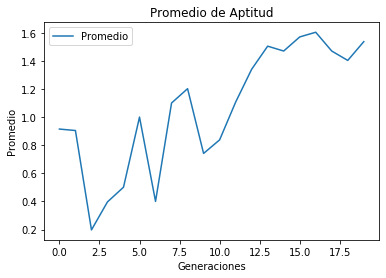

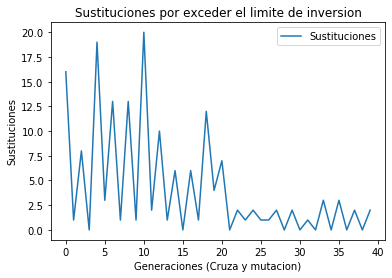

In [14]:
main()